### Linear Regression - Polynomial Fitting

- Objective: Learn to fit a third order polynomial to a sine function using PyTorch
tensors and automatic differentiation.
- Key concepts: Tensors, autograd, gradient descent, loss functions

In [27]:
import torch
import math
import matplotlib.pyplot as plt

##### Generating input data

In [28]:
x = torch.linspace(-math.pi, math.pi, 200)
y = torch.sin(x)

##### Weight Initialization

In [29]:
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

##### Training

In [30]:
learning_rate = 1e-5 # learning rate
for epoch in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 # forward pass
    loss = (y_pred - y).pow(2).sum() # calculate loss
    loss.backward() # backward pass
    with torch.no_grad(): # updating coefficients using gradient descent
        a-=learning_rate * a.grad
        b-=learning_rate * b.grad
        c-=learning_rate * c.grad
        d-=learning_rate * d.grad
        # set zero gradients after updating
        a.grad=None
        b.grad=None
        c.grad=None
        d.grad=None

##### Plotting results

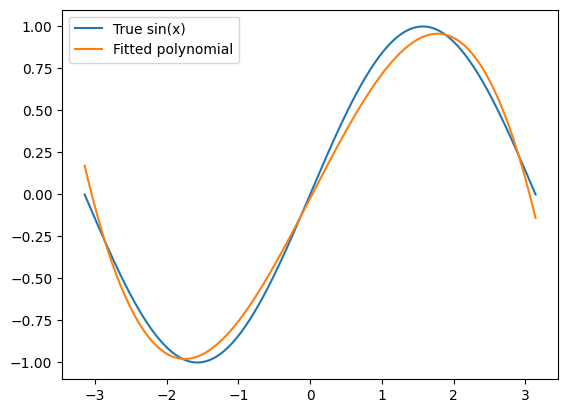

In [31]:
plt.plot(x.numpy(), y.numpy(), label='True sin(x)')
plt.plot(x.numpy(), (a + b * x + c * x ** 2 + d * x ** 3).detach().numpy(), label='Fitted polynomial')
plt.legend()
plt.show()

### MNIST Digit Classification

- Objective: Build neural networks for handwritten digit classification
- Key concepts: Neural network architecture, data loading, training loops

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # normalize pixel values to [-1, 1]
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# creating data loaders (to pass batch of 64 images at once)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:11<00:00, 885kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 97.6kB/s]
100%|██████████| 1.65M/1.65M [00:09<00:00, 183kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.58MB/s]


In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # fully connected layer (input: 784, output: 128)
        self.fc2 = nn.Linear(128, 64)     # hidden layer
        self.fc3 = nn.Linear(64, 10)      # output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # no activation function (logits)
        return x

model = NeuralNet()

In [4]:
criterion = nn.CrossEntropyLoss()  # suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # adam optimizer

In [5]:
num_epochs = 20  # number of training epochs
train_loss = {}
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # reset gradients
        outputs = model(images)  # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()  # backpropagation
        optimizer.step()  # update model weights

        running_loss += loss.item()

    loss = running_loss / len(train_loader)
    train_loss[epoch] = loss

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")

Epoch 1/20, Loss: 0.38814307980414137
Epoch 2/20, Loss: 0.18320173886554963
Epoch 3/20, Loss: 0.1342253425269763
Epoch 4/20, Loss: 0.11003597841006336
Epoch 5/20, Loss: 0.09117410717996707
Epoch 6/20, Loss: 0.08132558100648832
Epoch 7/20, Loss: 0.07239190563494995
Epoch 8/20, Loss: 0.06533808332196733
Epoch 9/20, Loss: 0.05814782605124965
Epoch 10/20, Loss: 0.0540544825638565
Epoch 11/20, Loss: 0.04916262227689663
Epoch 12/20, Loss: 0.04869496245303927
Epoch 13/20, Loss: 0.04086079072944551
Epoch 14/20, Loss: 0.038687427902146417
Epoch 15/20, Loss: 0.0370382146434429
Epoch 16/20, Loss: 0.03552348041897459
Epoch 17/20, Loss: 0.03296941366416639
Epoch 18/20, Loss: 0.03253810760630539
Epoch 19/20, Loss: 0.028979294834214686
Epoch 20/20, Loss: 0.0274065729046618


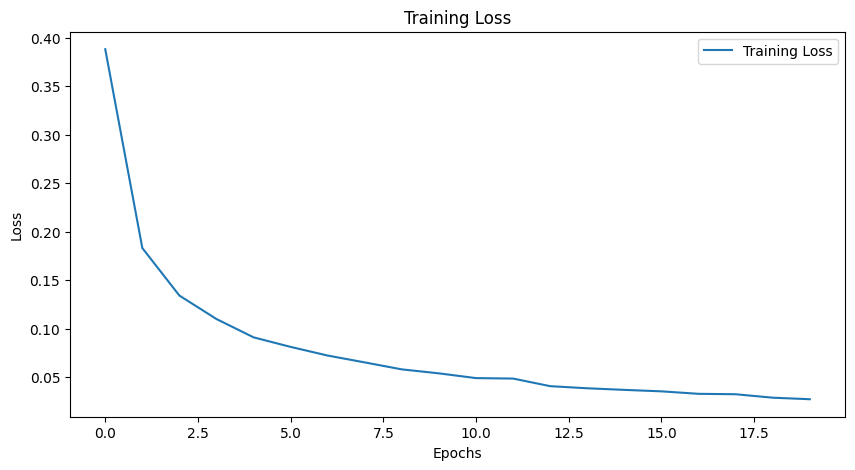

In [6]:
plt.figure(figsize=(10, 5))
losses = [train_loss[i] for i in range(len(train_loss))]
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [7]:
correct = 0
total = 0

with torch.no_grad():  # disable gradient computation for evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 97.47%


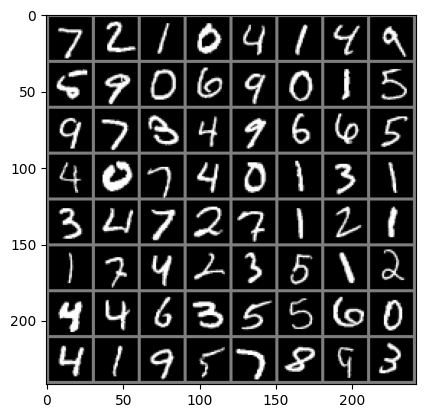

Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 5 3]
Actual:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3]


In [8]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray") # convert to HWC format
    plt.show()

# get a batch of test images
images, labels = next(iter(test_loader))

# display images
imshow(torchvision.utils.make_grid(images))

# get model predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# print predictions
print("Predicted:", predicted.cpu().numpy())
print("Actual:   ", labels.cpu().numpy())